# HW 4 Text Mining
## IST 707 
### Ritika Shetty

#### Importing required packages

In [1]:
import nltk
import os
os.chdir('C:/Users/ritshetty/Desktop/iSchool FALL 19/IST 707 Data Analytics/HW 4')

In [2]:
import pandas as pd
import numpy as np


#### Import the Dataset

In [3]:
data = pd.read_csv('HW4_yelp_sentiment.csv')

In [4]:
data.head()

,reviews,sentiment
0,Wow... Loved this place.,p
1,Crust is not good.,n
2,Not tasty and the texture was just nasty.,n
3,Stopped by during the late May bank holiday of...,p
4,The selection on the menu was great and so wer...,p


# Section 1

## EDA

In [5]:
data.describe()

,reviews,sentiment
count,988,988
unique,984,2
top,I would not recommend this place.,n
freq,2,494


In [6]:
data.groupby('sentiment').describe().head(10)

reviews                                               
            count unique                                top freq
sentiment                                                       
n             494    491  I would not recommend this place.    2
p             494    493                 I love this place.    2

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


data.sentiment.value_counts().plot(kind = 'bar')

#### We can conclude that the data is equally balanced Data

In [8]:
# creating a new column to calculate the review length to analyse if it has any effect on the sentiments
data['length'] = data['reviews'].apply(len)
data.head()

,reviews,sentiment,length
0,Wow... Loved this place.,p,24
1,Crust is not good.,n,18
2,Not tasty and the texture was just nasty.,n,41
3,Stopped by during the late May bank holiday of...,p,87
4,The selection on the menu was great and so wer...,p,59


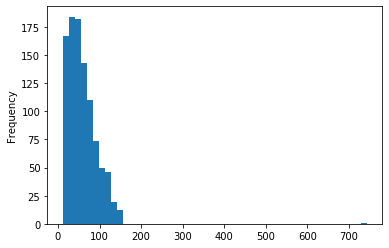

In [9]:
data['length'].plot(bins=50, kind='hist') 

#### We notice that there is some very long review with more than 700 characters!

In [10]:
data.length.describe()

count    988.000000
mean      58.528340
std       38.718769
min       11.000000
25%       32.750000
50%       51.000000
75%       79.000000
max      743.000000
Name: length, dtype: float64

#### There is a long review with 743 characters! 

In [11]:
data[data['length'] == 743]['reviews']

225    As for the "mains also uninspired.\t0\nThis is...
Name: reviews, dtype: object

In [12]:
#dropping the long review as it creates skewness in the datafor negative reviews

In [13]:
data = data.drop(data.index[225])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020849FE2EB8>,
      dtype=object)

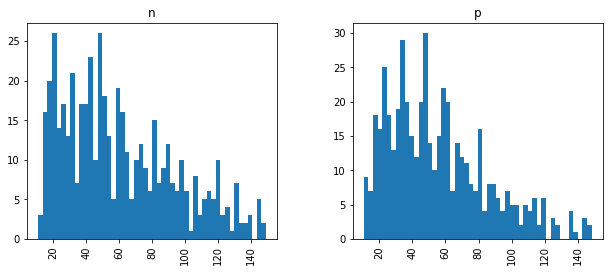

In [14]:
data.hist(column='length', by='sentiment', bins=50,figsize=(10,4))

In [15]:
#### We can notice that the length of character does not really have much effect on the reviews 

## Data / Test Pre- processing

In [16]:
# converting the sentiment column of positive 'p' as 1 and negative 'n' as 0
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'p' else 0)
data.sentiment.head()

0    1
1    0
2    0
3    1
4    1
Name: sentiment, dtype: int64

#### creating a Worldcloud for VIz

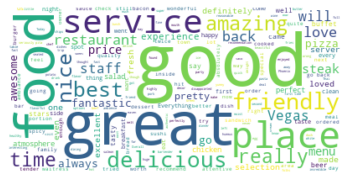

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

cloud_positive = " ".join(review for review in data[data["sentiment"]==1].reviews)
# Create and generate a word cloud image
stopwords = set(STOPWORDS)
cloud_positives = WordCloud(stopwords=stopwords,background_color='white').generate(cloud_positive)
 
# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

## Document Term matrix

In [18]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS 

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(data.reviews)
# Create sparse matrix from the vectorizer
X = vect.transform(data.reviews)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

Top 5 rows of the DataFrame: 
    absolutely  amazing  ambiance  area  atmosphere  attentive  authentic  \
0         0.0      0.0       0.0   0.0         0.0        0.0        0.0   
1         0.0      0.0       0.0   0.0         0.0        0.0        0.0   
2         0.0      0.0       0.0   0.0         0.0        0.0        0.0   
3         0.0      0.0       0.0   0.0         0.0        0.0        0.0   
4         0.0      0.0       0.0   0.0         0.0        0.0        0.0   

   away  awesome  bacon  ...  warm  wasn  waste  way  went  won  wonderful  \
0   0.0      0.0    0.0  ...   0.0   0.0    0.0  0.0   0.0  0.0        0.0   
1   0.0      0.0    0.0  ...   0.0   0.0    0.0  0.0   0.0  0.0        0.0   
2   0.0      0.0    0.0  ...   0.0   0.0    0.0  0.0   0.0  0.0        0.0   
3   0.0      0.0    0.0  ...   0.0   0.0    0.0  0.0   0.0  0.0        0.0   
4   0.0      0.0    0.0  ...   0.0   0.0    0.0  0.0   0.0  0.0        0.0   

   worst  worth  wrong  
0    0.0    0.0   

In [19]:
reviews_transformed.shape

(987, 200)

# Section 2

## Logistic Regression Classifier

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define X and y
y = data.sentiment
X = reviews_transformed


In [21]:
X_train1, X_val, y_train1, y_val = train_test_split( X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train1, y_train1)
    print ("C regularization parameter = %s yields accuracy of %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

C regularization parameter = 0.01 yields accuracy of 0.6194331983805668
C regularization parameter = 0.05 yields accuracy of 0.6842105263157895
C regularization parameter = 0.25 yields accuracy of 0.7206477732793523
C regularization parameter = 0.5 yields accuracy of 0.7408906882591093
C regularization parameter = 1 yields accuracy of 0.728744939271255


C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-pa

In [22]:
# Final Model Accuracy Calculation

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
final_model = LogisticRegression(C=1).fit(X_train, y_train)

print ("Model Accuracy: %s" % accuracy_score(y_test, final_model.predict(X_test)))


Model Accuracy: 0.7929292929292929


C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Section 3

## ANN & DL

In [23]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model 
#Add a dense layer 
model = Sequential()
model.add(Dense(1, input_shape=(200,), activation='sigmoid'))

#Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 201       
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [24]:
from keras.optimizers import Adam

In [25]:
# Creates a model given an activation and learning rate
def create_model(learning_rate=0.01, activation='relu'):
  
      # Create an Adam optimizer with the given learning rate
        opt = Adam(lr=learning_rate)
      
      # Create your binary classification model  
        model = Sequential()
        model.add(Dense(16, input_shape=(200,), activation=activation))
        model.add(Dense(16, activation=activation))
        model.add(Dense(1, activation='sigmoid'))
  
        # Compile your model with your optimizer, loss, and metrics
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model

In [26]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

params = {'activation':['relu', 'tanh'], 'batch_size':[10,16], 
          'epochs':[10,25,50], 'learning_rate':[0.1, 0.01, 0.001]}

# Create a randomize search cv  passing in the parameters created above
random_search = RandomizedSearchCV(model, param_distributions = params, cv = 3)


In [27]:
result = random_search.fit(X_train, y_train)

Epoch 1/10
526/526 [==============================] - 0s 596us/step - loss: 0.6349 - accuracy: 0.6407
Epoch 2/10
526/526 [==============================] - 0s 112us/step - loss: 0.5088 - accuracy: 0.7681
Epoch 3/10
526/526 [==============================] - 0s 122us/step - loss: 0.4347 - accuracy: 0.8004
Epoch 4/10
526/526 [==============================] - 0s 122us/step - loss: 0.3782 - accuracy: 0.8365
Epoch 5/10
526/526 [==============================] - 0s 139us/step - loss: 0.3812 - accuracy: 0.8403
Epoch 6/10
526/526 [==============================] - 0s 116us/step - loss: 0.3367 - accuracy: 0.8536
Epoch 7/10
526/526 [==============================] - 0s 108us/step - loss: 0.3215 - accuracy: 0.8612
Epoch 8/10
526/526 [==============================] - 0s 125us/step - loss: 0.2846 - accuracy: 0.8707
Epoch 9/10
526/526 [==============================] - 0s 118us/step - loss: 0.2783 - accuracy: 0.8726
Epoch 10/10
263/263 [==============================] - 0s 198us/step
Epoch 1/10
52

In [28]:
result.best_score_

0.7186311880747477

In [29]:
result.best_params_

{'learning_rate': 0.1, 'epochs': 50, 'batch_size': 10, 'activation': 'relu'}

In [30]:
# Redining the create model function with the best parameters
def create_model(learning_rate=0.001, activation='relu'):
  
      # Create an Adam optimizer with the given learning rate
        opt = Adam(lr=learning_rate)
      
      # Create your binary classification model  
        model = Sequential()
        model.add(Dense(16, input_shape=(200,), activation=activation))
        model.add(Dense(16, activation=activation))
        model.add(Dense(1, activation='sigmoid'))
  
        # Compile your model with your optimizer, loss, and metrics
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model


In [31]:
# Import KerasClassifier from keras wrappers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model, epochs = 10, 
                        batch_size = 16, verbose = 0)



In [32]:


# Train your model for 20 epochs
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate your model accuracy on the test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_pred))




Accuracy on the test set:  0.7929292929292929


# Section 4

## Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [34]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('Accuracy on the test set: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)/len(y_test))

Accuracy on the test set:  0.7777777777777778
[[0.37878788 0.13636364]
 [0.08585859 0.3989899 ]]


#### Multinomial Naive Bayes - We are using Multinomial Naive Bayes over Gaussian because with sparse data, Gaussian Naive Bayes assumptions aren't met and a simple gaussian fit over the data will not give us a good fit or prediction!

#### There isn't a hyper-parameter to tune, so you have nothing to grid search over.

# Section 5

In [38]:
# Craeting a dataframe for accuracy compomarison

list = [{ 'Model' : 'Logistic Regression', 'Accuracy' : 79},
       {'Model' : 'Neural Network', 'Accuracy' : 79.3},
       {'Model' : 'Naive Bayes Classifier', 'Accuracy' : 77}]

df = pd.DataFrame(list)

In [39]:
df.head()

,Accuracy,Model
0,79.0,Logistic Regression
1,79.3,Neural Network
2,77.0,Naive Bayes Classifier


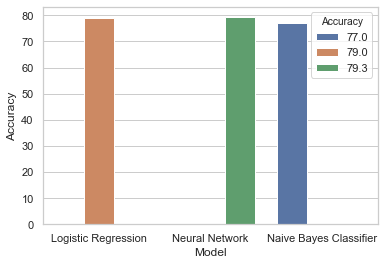

In [40]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.barplot(x='Model', y="Accuracy", data=df, hue = 'Accuracy' )

### Conclusions

#### The best performing Model is ANN with the higest Accuracy
#### Here the model evaluation metri selected is accuracy because the data is balanced and hence accuracy can be considered a good metric for evaluation
#### As per oberservationa and intuition the most time consuming was training and tuning neural net
#### least time consuming to build the model was naive bayes since its based on naive assumotion and no hyperparameters to tune it has no train time